<h1 style="text-align:center; font-family:Arial; color:Green;">
  Titanic EDA & Analysis
</h1>

<p style="text-align:center; font-family:Arial; color:#555;">
  A clear and structured overview of the dataset and model insights.
</p>

<hr style="border:1px solid Green;">


In [492]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #Importing Libraries

In [497]:
df = pd.read_csv(r"C:\Users\Vijay_k943wj6\Desktop\DataTry1\Data Science try\Project\train.csv") #Importing Dataset

In [498]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ol>
PassengerId – unique ID for each passenger.

Survived – target label: 0 = died, 1 = survived.

Pclass – ticket class (1 = upper, 2 = middle, 3 = lower).

Name – passenger’s full name.

Sex – male/female.

Age – age in years (has missing values).

SibSp – siblings/spouses aboard.

Parch – parents/children aboard.

Ticket – ticket number (messy text field).

Fare – ticket price.

Cabin – cabin number (mostly missing).

Embarked – port of boarding (S, C, Q).    </ol>

<p>The Dataset Contain Some Null Values Also</p>

In [500]:
df['Embarked']= df['Embarked'].str.strip()

In [501]:
df['Total_Family_Pass'] = df['SibSp'] + df['Parch'] + 1 ##Adding Total Family Member including the Passenger itself

In [502]:
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Parch', 'SibSp', 'Ticket'], axis = 1) ##Removing the Useless Columns for Machine Building

In [503]:
mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean) ##Replacing Mean Value with Mean of Age.

In [504]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Family_Pass
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [505]:
mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode)  ## Removed All Null Values from the DataSet

<h4>Visualizations</h4>

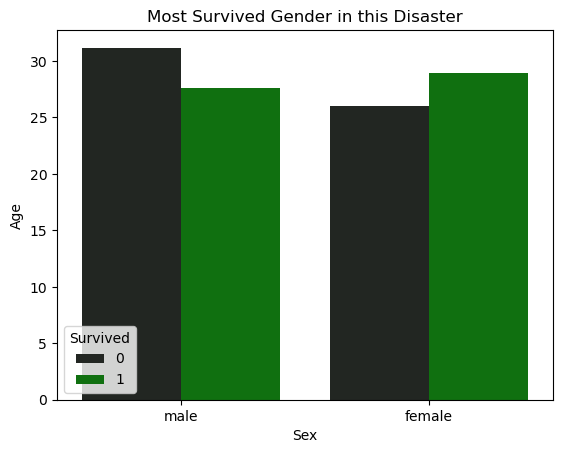

In [506]:
sns.barplot(data = df, x = 'Sex', y = 'Age', hue = 'Survived', ci = False, color = 'Green')
plt.title('Most Survived Gender in this Disaster');

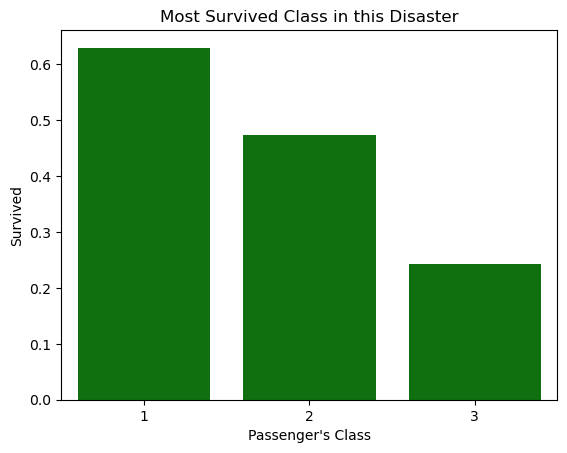

In [507]:
sns.barplot(data = df, x = 'Pclass', y = 'Survived', ci = False, color = 'Green')
plt.title('Most Survived Class in this Disaster')
plt.xlabel("Passenger's Class");

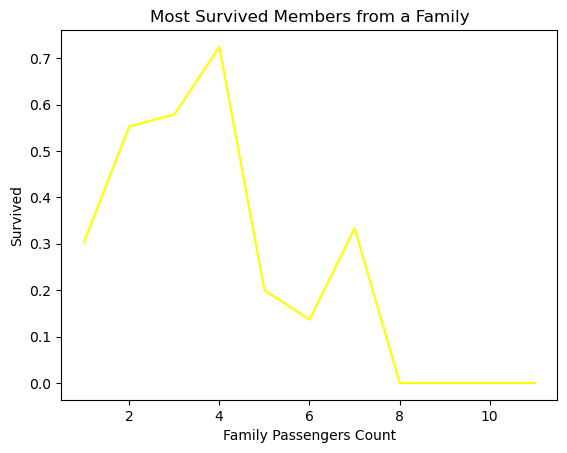

In [508]:
sns.lineplot(data = df, x = 'Total_Family_Pass', y = 'Survived', ci = False, color = 'Yellow')
plt.title('Most Survived Members from a Family')
plt.xlabel("Family Passengers Count");

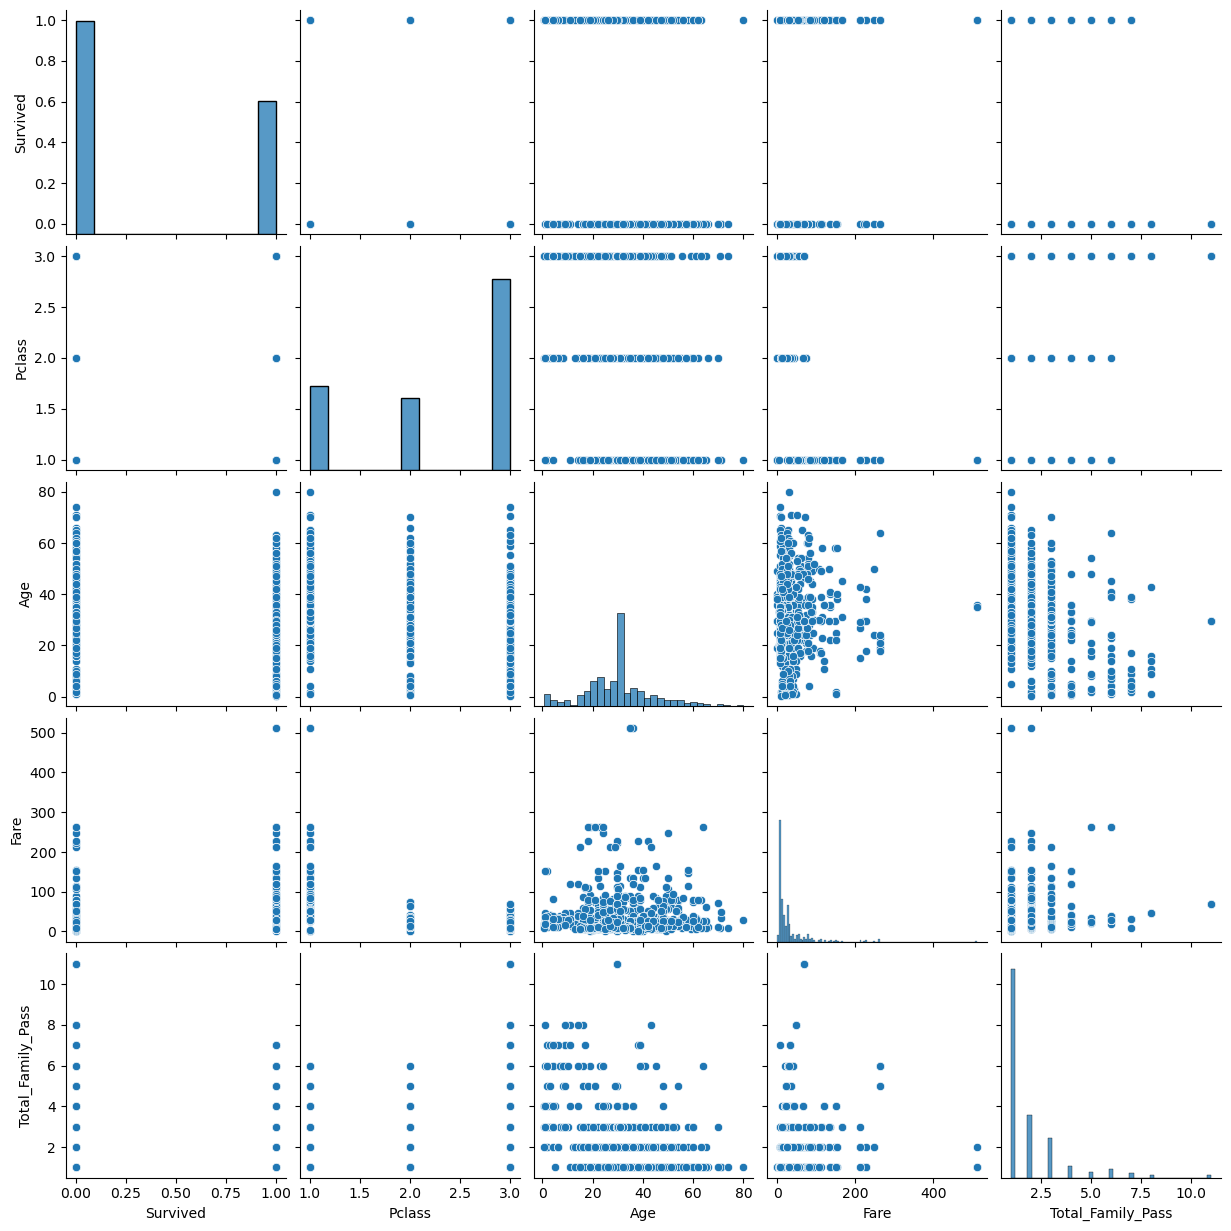

In [509]:
sns.pairplot(df);

In [510]:
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first = True) ##One-Hot-Encoding

In [511]:
df

,Survived,Pclass,Age,Fare,Total_Family_Pass,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,2,True,False,True
1,1,1,38.000000,71.2833,2,False,False,False
2,1,3,26.000000,7.9250,1,False,False,True
3,1,1,35.000000,53.1000,2,False,False,True
4,0,3,35.000000,8.0500,1,True,False,True
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,True,False,True
887,1,1,19.000000,30.0000,1,False,False,True
888,0,3,29.699118,23.4500,4,False,False,True
889,1,1,26.000000,30.0000,1,True,False,False


In [512]:
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int) #Changing to Integer type, Because Machines prefer Binary types more

<h4>Towards Model Building</h4>

In [513]:
from sklearn.model_selection import train_test_split

In [514]:
x = df.drop('Survived', axis = 1)

In [515]:
y = df['Survived']

In [516]:
x_train,x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 45)

In [517]:
from sklearn.preprocessing import StandardScaler

In [518]:
scaler = StandardScaler()

In [519]:
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns,index=x_train.index)

In [520]:
x_test = pd.DataFrame( scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

<h4>LogisticRegression Model</h4>

In [521]:
from sklearn.linear_model import LogisticRegression

In [522]:
lr = LogisticRegression()

In [523]:
lr.fit(x_train, y_train)

LogisticRegression()

In [524]:
y_pred_train = lr.predict(x_train)

In [525]:
y_pred_test = lr.predict(x_test)

In [526]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, confusion_matrix

In [527]:
accuracy_trained = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [528]:
recall = recall_score(y_test, y_pred_test)

In [529]:
classification = classification_report(y_test, y_pred_test)

In [530]:
print('Accuracy of Logistic Regression in Training :', accuracy_trained)
print(f"Accuracy of Logistic Regression in Testing : {accuracy_test}")
print(f"Recall Score of the Logistic Regression in Testing :{recall}")

Accuracy of Logistic Regression in Training : 0.78330658105939
Accuracy of Logistic Regression in Testing : 0.8208955223880597
Recall Score of the Logistic Regression in Testing :0.7777777777777778


In [531]:
print(f"Classification report of the Logisitic Regression is \n{classification}")

Classification report of the Logisitic Regression is 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       178
           1       0.71      0.78      0.74        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.83      0.82      0.82       268



<h4>RandomForestClassifier Model</h4>

In [532]:
from sklearn.ensemble import RandomForestClassifier

In [533]:
rfc = RandomForestClassifier()

In [534]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [535]:
y_pred_train_rfc = rfc.predict(x_train)

In [536]:
y_pred_test_rfc = rfc.predict(x_test)

In [537]:
accuracy_train_rfc = accuracy_score(y_train, y_pred_train_rfc)

In [538]:
accuracy_test_rfc = accuracy_score(y_test, y_pred_test_rfc)

In [539]:
recall_rfc = recall_score(y_test, y_pred_test)

In [540]:
classification_rfc = classification_report(y_test, y_pred_test)

In [541]:
print('Accuracy of Random Forest in Training :', accuracy_train_rfc)
print(f"Accuracy of Random Forest in Testing : {accuracy_test_rfc}")
print(f"Recall Score of the Random Forest in Testing :{recall_rfc}")

Accuracy of Random Forest in Training : 0.9807383627608347
Accuracy of Random Forest in Testing : 0.8283582089552238
Recall Score of the Random Forest in Testing :0.7777777777777778


In [542]:
print(f'Classification Report of Random Forest Model:\n {classification_rfc}')

Classification Report of Random Forest Model:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       178
           1       0.71      0.78      0.74        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.83      0.82      0.82       268



<h4>XGBClassifier Model</h4>

In [543]:
from xgboost import XGBClassifier

In [544]:
xgb = XGBClassifier()

In [545]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [546]:
y_pred_testx = xgb.predict(x_test)

In [547]:
accuracy_x = accuracy_score(y_test, y_pred_testx)
accuracy_x

0.8395522388059702

In [548]:
recall_x = recall_score(y_test, y_pred_testx)

In [549]:
classx = classification_report(y_test, y_pred_testx)

In [550]:
print(f"Accuracy of XGB in Testing : {accuracy_x}")
print(f"Recall Score of the XGB in Testing :{recall_x}")
print(f'Classification Report in XGB \n{classx}')

Accuracy of XGB in Testing : 0.8395522388059702
Recall Score of the XGB in Testing :0.8222222222222222
Classification Report in XGB 
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       178
           1       0.73      0.82      0.77        90

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.85      0.84      0.84       268



In [551]:
import pickle

In [552]:
feature_names = x_train.columns

with open("titanic_prediction.pkl", "wb") as file:
    pickle.dump((xgb, feature_names, scaler), file)


In [553]:
df_test = pd.read_csv(r"C:\Users\Vijay_k943wj6\Desktop\DataTry1\Data Science try\Project\test.csv")

In [554]:
# store PassengerId before dropping
passenger_ids = df_test["PassengerId"].copy()

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Total_Family_Pass'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test = df_test.drop(['PassengerId', 'Name', 'Cabin', 'Parch', 'SibSp', 'Ticket'], axis=1)
df_test = pd.get_dummies(df_test, columns=['Sex','Embarked'], drop_first=True)


In [555]:
df_test = df_test.reindex(columns=feature_names, fill_value=0)

In [556]:
df_test_scaled = scaler.transform(df_test)

In [557]:
pred = xgb.predict(df_test_scaled)
print(pred)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1]


<h5>final output is a list of predicted survival classes (0 = died, 1 = survived).</h5>

In [558]:
output = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": pred
})

output.to_csv("submission.csv", index=False)
print("submission.csv created!")


submission.csv created!


<h2>Summary</h2>

<h3>This project focuses on predicting whether a passenger survived the Titanic disaster using classical machine-learning models. The dataset was cleaned, preprocessed, and enhanced through feature engineering before training the models.</h3>

<h3>After preprocessing, final dataset included:

Pclass

Sex (encoded to 0/1)

Age

Fare

Embarked (converted using one-hot encoding)

Total_Family_Pass (engineered feature: SibSp + Parch + 1)

These features represent socio-economic status, demographic information, and family structure, all of which significantly influence survival probability</h3>

<h3>Models I Tried</h3>

<h3>1. Logistic Regression

Training Accuracy: ~0.78

Testing Accuracy: ~0.82

Recall: ~0.77

Notes:

Very stable

No overfitting

Strong baseline classifier</h3>

<h3>2. Random Forest Classifier

Training Accuracy: ~0.98

Testing Accuracy: ~0.84

Recall: ~0.77

Notes:

Strong performance

Mild overfitting (typical for Random Forest)
</h3>

<h3>3. XGBoost Classifier

Testing Accuracy: ~0.84

Recall: ~0.82

Notes:

Best-performing model

Highest recall for the “survived” class

Balanced performance

Handles non-linear patterns effectively</h3>

<h2>Final Best Model</h2>

<h3><u>XGBoost</u></h3>

<h4>
It achieves the best overall performance, especially on recall and F1-score, making it the most reliable model for prediction.</h4>

<h2>Key Observation</h2>

<h3><ol>
    <li>Almost all models converge to 82–85 percent accuracy.</li

<li>Recall (ability to correctly identify survivors) is best in XGBoost.</li>

<li>Logistic Regression provides the cleanest baseline.</li>

<li>Random Forest is strong but slightly overfits.</li>
</ol></h3>

<h3>The project demonstrates effective data preprocessing, feature engineering, and model comparison.
XGBoost stands out as the optimal model, while Logistic Regression and Random Forest support the analysis by providing diverse perspectives.
Together, these results show a well-rounded understanding of machine learning approaches for classification problems.</h3>